In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive'

/content/gdrive/MyDrive


In [ ]:
!git clone 'https://github.com/xxwikkixx/HarmonicPattern.git'

Cloning into 'HarmonicPattern'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 165 (delta 74), reused 119 (delta 32), pack-reused 0
Receiving objects: 100% (165/165), 798.11 KiB | 9.85 MiB/s, done.
Resolving deltas: 100% (74/74), done.


In [ ]:
%cd '/content/gdrive/MyDrive/HarmonicPattern/Harmonics'

/content/gdrive/MyDrive/HarmonicPattern/Harmonics


In [ ]:
!pip install yfinance
import yfinance as yf # import libraries

     |████████████████████████████████| 6.3MB 29.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=4d91e7dbdf343d483814c9adff6353a835b3fb638076b57ccf26248f0cd8571b
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import matplotlib.pyplot as plt
from harmonic_func import *

In [ ]:
data = yf.download('ACC.NS', 
                  start='2010-06-15', 
                  end='2021-07-13')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data = data.drop_duplicates(keep=False)
price = data['Close'].copy()
err_allowed = 10.0/100

In [ ]:
price

Date
2010-06-15     879.900024
2010-06-16     863.599976
2010-06-17     865.450012
2010-06-18     862.099976
2010-06-21     882.650024
                 ...     
2021-07-06    2022.849976
2021-07-07    2036.550049
2021-07-08    2029.500000
2021-07-09    2037.250000
2021-07-12    2072.300049
Name: Close, Length: 2731, dtype: float64

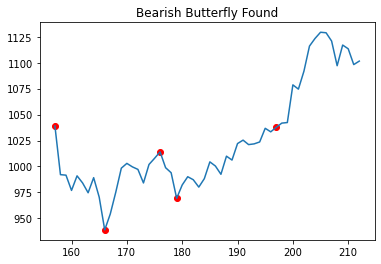

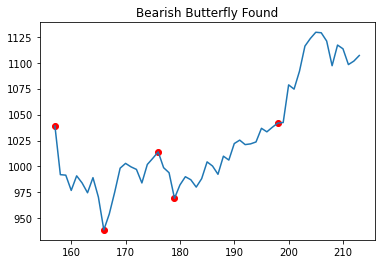

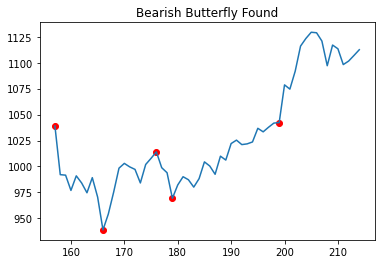

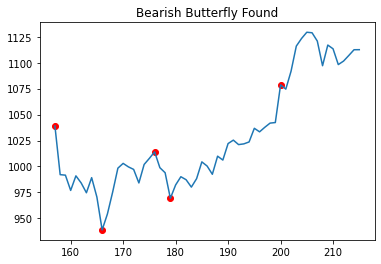

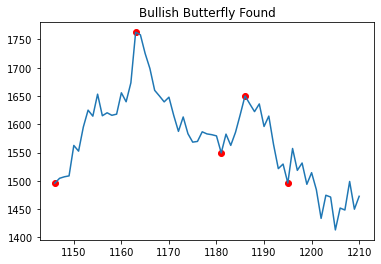

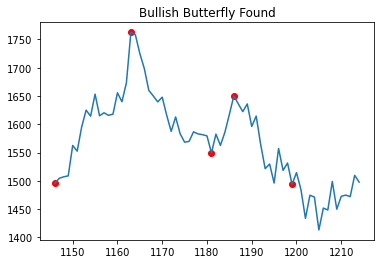

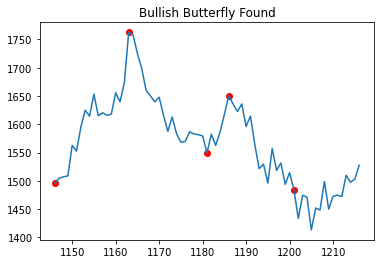

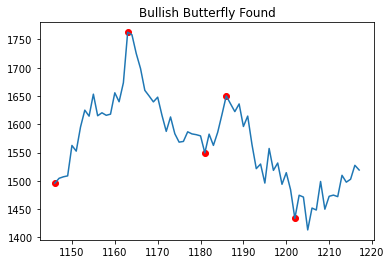

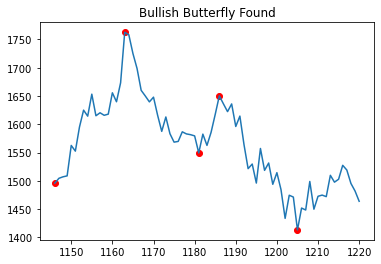

In [ ]:
# Find peaks
for i in range(100, len(price)):
    current_idx, current_pat, start, end = peak_detect(price.values[:i])
    XA = current_pat[1] - current_pat[0]
    AB = current_pat[2] - current_pat[1]
    BC = current_pat[3] - current_pat[2]
    CD = current_pat[4] - current_pat[3]
    moves = [XA, AB, BC, CD]
    butterfly = is_Butterfly(moves, err_allowed)
    harmonics = np.array([butterfly])
    label=['Butterfly']
    if np.any(harmonics == 1) or np.any(harmonics == -1):
        for j in range(0, len(harmonics)):
            if harmonics[j] == 1 or harmonics[j] == -1:
                sense = 'Bearish ' if harmonics[j] == -1 else 'Bullish '
                label = sense + labels[j] + ' Found'
                plt.title(label)
                plt.plot(np.arange(start, i+15), price.values[start:i+15])
                # plt.xscale(price.index())
                plt.scatter(current_idx, current_pat, c='r')
                plt.show()

In [ ]:
data=data.reset_index()

In [ ]:
data[1148:1170]

,index,Date,Open,High,Low,Close,Adj Close,Volume
1148,1148,2015-02-06,1503.000000,1525.000000,1481.449951,1507.199951,1342.270752,275011
1149,1149,2015-02-09,1501.449951,1515.500000,1489.550049,1508.849976,1343.740479,263261
1150,1150,2015-02-10,1502.900024,1567.800049,1492.800049,1562.650024,1391.653320,582025
1151,1151,2015-02-11,1567.000000,1574.800049,1546.300049,1552.599976,1382.702759,489855
1152,1152,2015-02-12,1567.449951,1614.300049,1560.650024,1595.199951,1420.641479,875361
1153,1153,2015-02-13,1608.000000,1637.550049,1605.000000,1625.050049,1447.224854,542357
1154,1154,2015-02-16,1632.400024,1645.000000,1605.099976,1614.449951,1437.784912,327835
1155,1155,2015-02-18,1614.699951,1658.699951,1611.099976,1653.300049,1472.383423,471411
1156,1156,2015-02-19,1662.400024,1665.000000,1602.699951,1615.150024,1438.408325,337618
1157,1157,2015-02-20,1623.400024,1625.150024,1600.000000,1620.400024,1443.083618,288973
